In [121]:
import pandas as pd
from pandas import *
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
file = os.path.join("Resources","Gun_Death_Events_By_ICD-10_113_Cause.txt")
csv_file = pd.read_csv(file, delimiter="\t")

In [122]:
csv_file.rename(columns={"ICD-10 113 Cause": "Causes"}, inplace=True)
csv_file.head()

,Year,State,Causes,Deaths
0,2013,Alabama,Accidental discharge of firearms (W32-W34),25
1,2013,Alabama,Intentional self-harm (suicide) by discharge o...,504
2,2013,Alabama,Assault (homicide) by discharge of firearms (*...,317
3,2013,Alabama,"#Legal intervention (Y35,Y89.0)",0
4,2013,Alaska,Accidental discharge of firearms (W32-W34),0


In [123]:
csv_file_drop = csv_file.drop(csv_file.columns[[0, 2]], axis=1)
group_gun_violent = csv_file_drop.groupby("State", as_index=False).sum()
group_gun_violent.head()


,State,Deaths
0,Alabama,3622
1,Alaska,598
2,Arizona,3854
3,Arkansas,2011
4,California,12201


In [124]:
supplier = os.path.join("Resources","group_license_count.csv")
supplier_df = pd.read_csv(supplier)
supplier_df.head()

,State,Gun Supplier Count
0,Alaska,528
1,Alabama,1043
2,Arkansas,1087
3,Arizona,1668
4,California,2224


In [126]:
supplier_death_df = pd.merge(supplier_df, group_gun_violent, on="State")
supplier_death_df.head()

,State,Gun Supplier Count,Deaths
0,Alaska,528,598
1,Alabama,1043,3622
2,Arkansas,1087,2011
3,Arizona,1668,3854
4,California,2224,12201


In [127]:
csv_file.columns

Index(['Year', 'State', 'Causes', 'Deaths'], dtype='object')

In [128]:
revise_csv_file = csv_file.loc[csv_file["Causes"]=="Accidental discharge of firearms (W32-W34)"]
revise_csv_file.head()

,Year,State,Causes,Deaths
0,2013,Alabama,Accidental discharge of firearms (W32-W34),25
4,2013,Alaska,Accidental discharge of firearms (W32-W34),0
8,2013,Arizona,Accidental discharge of firearms (W32-W34),0
12,2013,Arkansas,Accidental discharge of firearms (W32-W34),15
16,2013,California,Accidental discharge of firearms (W32-W34),35


In [129]:
csv_file_pivot = csv_file.pivot_table(index=['Year','State'], columns='Causes', values='Deaths')
csv_file_pivot.head()

Causes           #Legal intervention (Y35,Y89.0)  \
Year State                                         
2013 Alabama                                   0   
     Alaska                                    0   
     Arizona                                  13   
     Arkansas                                  0   
     California                               97   

Causes           Accidental discharge of firearms (W32-W34)  \
Year State                                                    
2013 Alabama                                             25   
     Alaska                                               0   
     Arizona                                              0   
     Arkansas                                            15   
     California                                          35   

Causes           Assault (homicide) by discharge of firearms (*U01.4,X93-X95)  \
Year State                                                                      
2013 Alabama                                                   317              
     Alaska                                                     19              
     Arizona                                                   251              
     Arkansas                                                  152              
     California                                               1312              

Causes           Intentional self-harm (suicide) by discharge of firearms (X72-X74)  
Year State                                                                           
2013 Alabama                                                   504                   
     Alaska                                                    120                   
     Arizona                                                   655                   
     Arkansas                                                  322                   
     California                                               1571

In [130]:
csv_file_pivot_sum = csv_file.pivot_table(index='State', columns='Causes', values='Deaths', aggfunc='sum')
csv_file_pivot_sum.head()

Causes,"#Legal intervention (Y35,Y89.0)",Accidental discharge of firearms (W32-W34),"Assault (homicide) by discharge of firearms (*U01.4,X93-X95)",Intentional self-harm (suicide) by discharge of firearms (X72-X74)
State,,,,
Alabama,12,95,1454,2061
Alaska,0,0,127,471
Arizona,52,0,1002,2800
Arkansas,0,43,650,1318
California,363,123,5408,6307


In [131]:
csv_file_pivot_sum = csv_file_pivot_sum.reset_index().rename_axis(None, axis=1)
csv_file_pivot_sum.head()

,State,"#Legal intervention (Y35,Y89.0)",Accidental discharge of firearms (W32-W34),"Assault (homicide) by discharge of firearms (*U01.4,X93-X95)",Intentional self-harm (suicide) by discharge of firearms (X72-X74)
0,Alabama,12,95,1454,2061
1,Alaska,0,0,127,471
2,Arizona,52,0,1002,2800
3,Arkansas,0,43,650,1318
4,California,363,123,5408,6307


In [132]:
supplier_independent_death_df = pd.merge(supplier_df, csv_file_pivot_sum, on="State")
supplier_independent_death_df.head()

,State,Gun Supplier Count,"#Legal intervention (Y35,Y89.0)",Accidental discharge of firearms (W32-W34),"Assault (homicide) by discharge of firearms (*U01.4,X93-X95)",Intentional self-harm (suicide) by discharge of firearms (X72-X74)
0,Alaska,528,0,0,127,471
1,Alabama,1043,12,95,1454,2061
2,Arkansas,1087,0,43,650,1318
3,Arizona,1668,52,0,1002,2800
4,California,2224,363,123,5408,6307


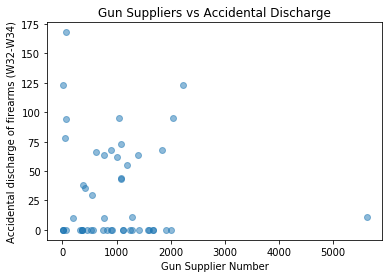

In [133]:
plt.scatter(supplier_independent_death_df["Gun Supplier Count"], supplier_independent_death_df["Accidental discharge of firearms (W32-W34)"], alpha=0.5)
plt.title("Gun Suppliers vs Accidental Discharge")
plt.xlabel("Gun Supplier Number")
plt.ylabel("Accidental discharge of firearms (W32-W34)")
plt.show()

In [134]:
population = os.path.join("Resources","us_census_sorted_data.csv")
population_df = pd.read_csv(population)
population_df.rename(columns={"State Name": "State"}, inplace=True)
population_df
population_df.head()

,Unnamed: 0,State,Population,income per capita,unemployment_rate(%),poverty_rate(%),no_college_education_rate(%)
0,0,Alabama,4817678.0,23936.0,4.747432,18.467610,17.988957
1,1,Alaska,728300.0,33129.0,4.407112,9.867637,14.591377
2,2,Arizona,6561516.0,25537.0,4.634097,17.820714,14.217233
3,3,Arkansas,2947036.0,22595.0,3.905280,18.639168,19.922322
4,4,California,38066920.0,29906.0,5.476051,16.064457,13.719686


In [135]:
supplier_death_population_df = pd.merge(supplier_independent_death_df, population_df, on="State")
supplier_death_population_df.head()

,State,Gun Supplier Count,"#Legal intervention (Y35,Y89.0)",Accidental discharge of firearms (W32-W34),"Assault (homicide) by discharge of firearms (*U01.4,X93-X95)",Intentional self-harm (suicide) by discharge of firearms (X72-X74),Unnamed: 0,Population,income per capita,unemployment_rate(%),poverty_rate(%),no_college_education_rate(%)
0,Alaska,528,0,0,127,471,1,728300.0,33129.0,4.407112,9.867637,14.591377
1,Alabama,1043,12,95,1454,2061,0,4817678.0,23936.0,4.747432,18.467610,17.988957
2,Arkansas,1087,0,43,650,1318,3,2947036.0,22595.0,3.905280,18.639168,19.922322
3,Arizona,1668,52,0,1002,2800,2,6561516.0,25537.0,4.634097,17.820714,14.217233
4,California,2224,363,123,5408,6307,4,38066920.0,29906.0,5.476051,16.064457,13.719686


In [136]:
supplier_death_population_df["income per capita_per_Population(%)"] = (supplier_death_population_df["income per capita"] / supplier_death_population_df["Population"])*100
supplier_death_population_df["Gun_Suppliers_per_Population(%)"] = (supplier_death_population_df["Gun Supplier Count"] / supplier_death_population_df["Population"])*100
supplier_death_population_df["Suicide_per_Population(%)"] = (supplier_death_population_df["Intentional self-harm (suicide) by discharge of firearms (X72-X74)"] / supplier_death_population_df["Population"])*100
supplier_death_population_df.head()

,State,Gun Supplier Count,"#Legal intervention (Y35,Y89.0)",Accidental discharge of firearms (W32-W34),"Assault (homicide) by discharge of firearms (*U01.4,X93-X95)",Intentional self-harm (suicide) by discharge of firearms (X72-X74),Unnamed: 0,Population,income per capita,unemployment_rate(%),poverty_rate(%),no_college_education_rate(%),income per capita_per_Population(%),Gun_Suppliers_per_Population(%),Suicide_per_Population(%)
0,Alaska,528,0,0,127,471,1,728300.0,33129.0,4.407112,9.867637,14.591377,4.548812,0.072498,0.064671
1,Alabama,1043,12,95,1454,2061,0,4817678.0,23936.0,4.747432,18.467610,17.988957,0.496837,0.021649,0.042780
2,Arkansas,1087,0,43,650,1318,3,2947036.0,22595.0,3.905280,18.639168,19.922322,0.766703,0.036885,0.044723
3,Arizona,1668,52,0,1002,2800,2,6561516.0,25537.0,4.634097,17.820714,14.217233,0.389194,0.025421,0.042673
4,California,2224,363,123,5408,6307,4,38066920.0,29906.0,5.476051,16.064457,13.719686,0.078562,0.005842,0.016568


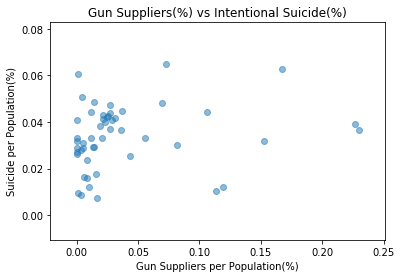

P-Value: 0.24468839538877046 
R-squared: 0.02808787371860524


In [137]:
plt.scatter(supplier_death_population_df["Gun_Suppliers_per_Population(%)"], supplier_death_population_df["Suicide_per_Population(%)"], alpha=0.5)
plt.title("Gun Suppliers(%) vs Intentional Suicide(%)")
plt.xlabel("Gun Suppliers per Population(%)")
plt.ylabel("Suicide per Population(%)")
plt.show()
gradient, intercept, r_value, p_value, std_err = stats.linregress(supplier_death_population_df["Gun_Suppliers_per_Population(%)"], supplier_death_population_df["Suicide_per_Population(%)"])
print("P-Value: {} ".format(p_value))
print("R-squared:", r_value**2)

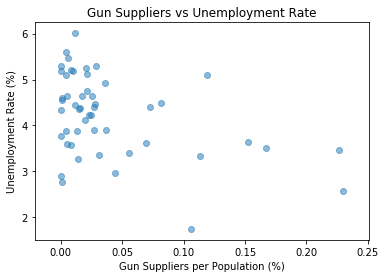

P-Value: 0.001900374150177312 
R-squared: 0.18369786482160855


In [138]:
plt.scatter(supplier_death_population_df["Gun_Suppliers_per_Population(%)"], supplier_death_population_df["unemployment_rate(%)"], alpha=0.5)
plt.title("Gun Suppliers vs Unemployment Rate")
plt.xlabel("Gun Suppliers per Population (%)")
plt.ylabel("Unemployment Rate (%)")
plt.show()
gradient, intercept, r_value, p_value, std_err = stats.linregress(supplier_death_population_df["Gun_Suppliers_per_Population(%)"], supplier_death_population_df["unemployment_rate(%)"])
print("P-Value: {} ".format(p_value))
print("R-squared:", r_value**2)

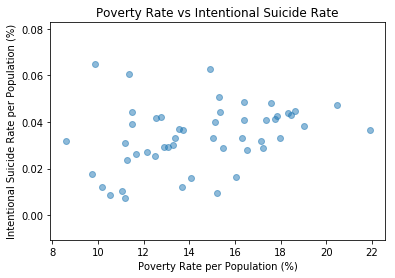

P-Value: 0.08503208037523534 
R-squared: 0.060526007940771155


In [140]:
plt.scatter(supplier_death_population_df["poverty_rate(%)"], supplier_death_population_df["Suicide_per_Population(%)"], alpha=0.5)
plt.title("Poverty Rate vs Intentional Suicide Rate")
plt.xlabel("Poverty Rate per Population (%)")
plt.ylabel("Intentional Suicide Rate per Population (%)")
plt.show()
gradient, intercept, r_value, p_value, std_err = stats.linregress(supplier_death_population_df["Gun_Suppliers_per_Population(%)"], supplier_death_population_df["poverty_rate(%)"])
print("P-Value: {} ".format(p_value))
print("R-squared:", r_value**2)

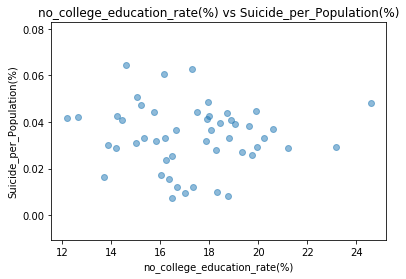

Gradient and intercept -0.00022939074432393105 0.03784068099786901
r-squared: 0.0017726138219704103


In [110]:
plt.scatter(supplier_death_population_df["no_college_education_rate(%)"], supplier_death_population_df["Suicide_per_Population(%)"], alpha=0.5)
plt.title("no_college_education_rate(%) vs Suicide_per_Population(%)")
plt.xlabel("no_college_education_rate(%)")
plt.ylabel("Suicide_per_Population(%)")
plt.show()
gradient, intercept, r_value, p_value, std_err = stats.linregress(supplier_death_population_df["no_college_education_rate(%)"], supplier_death_population_df["Suicide_per_Population(%)"])
print("Gradient and intercept", gradient, intercept)
print("r-squared:", r_value**2)